# plot.ipynb
> Ploting script <br>
> by ***Mert SIDE*** and ***Ghazanfar ALI*** <br>
> for "A Multi-Objective Approach for GPU Optimal Frequency Selection" <br>
> on 20212022 <br>
___

In [1]:
#!/usr/bin/python3

# ============================================================================
# plot.ipynb
#   Ploting script 
#   by Mert SIDE and Ghazanfar ALI
#   for "A Multi-Objective Approach for GPU Optimal Frequency Selection"
#   on 20212022
# ============================================================================

# GENERIC
import sys
import statistics
import itertools
import datetime as dt
from os import error
from typing_extensions import runtime

# NUMPY
import numpy as np
from numpy.lib import type_check
from numpy.core.fromnumeric import mean

# PANDAS
import pandas as pd

# MATPLOTLIB
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib.offsetbox import (TextArea, 
                                  DrawingArea, 
                                  OffsetImage, 
                                  AnnotationBbox)
from matplotlib.patches import Rectangle

# SEABORN
import seaborn as sns
from seaborn.palettes import color_palette

# SKLEARN
import sklearn
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.utils import shuffle

# MISC.
from xgboost import XGBRegressor

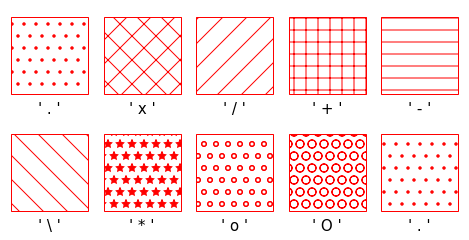

In [2]:
# DEMO hatches ===============================================================
fig, axs = plt.subplots(2, 5, constrained_layout=True, figsize=(6.4, 3.2))

hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
# colors = ['red', 'green', 'blue']
colors = itertools.cycle(['r','g', 'b', 'm', 'y', 'c'])
hatches = itertools.cycle(['.','x', '/', '+', '-', '\\', '*', 'o', 'O'])

def hatches_plot(ax, h):
    ax.add_patch(Rectangle((0, 0), 2, 2, fill=False, hatch=h, color='red'))
    ax.text(1, -0.5, f"' {h} '", size=15, ha='center')
    ax.axis('equal')
    ax.axis('off')

for ax, h in zip(axs.flat, hatches):
    hatches_plot(ax, h)
# END OF DEMO hatches ========================================================

In [3]:
# ============================================================================
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
# END OF change_width() ======================================================

xss = 6
ss  = 8
ms  = 10
ls  = 12
xls = 14

matplotlib.rc('xtick', labelsize=ss) 
matplotlib.rc('ytick', labelsize=ss) 

figureExtension = '.pdf'
# figureExtension = '.png'
# figureExtension = '.svg'

In [4]:
# apps_list = ['dgemm','stream','tpacf','stencil','lbm','fft','spmv','mriq',
#              'histo','bfs','cutcp','kmeans','lavamd','cfd','nw','hotspot',
#              'lud','ge','srad','heartwall','bplustree']
# # apps_list = ['NAMD','LAMMPS','LSTM']

# f = 'regid/predicted_power_runtime_energy.csv'
# # f = 'liberal/predicted_power_runtime_energy.csv'
# # f = 'liberal/hpcc/mean_fp_data_HPC_apps.csv'
# # f = 'liberal/hpcc/predicted_power_runtime_energy_HPC_apps.csv'
# # f = 'liberal/2f/hpc/2f-predicted_power_runtime_energy_HPC_apps.csv'
# # f = 'liberal/2f/2f-predicted_power_runtime_energy_21_apps.csv'

___
# Impact of frequencies on the power consumption and run time of DGEMM and STREAM [Figure 3]

In [5]:
# plt_pwr_perf_dvfs() ========================================================
def plt_pwr_perf_dvfs(d):
    sub_plts = []
    
    s_size = 20
    lbl = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p',
           'q','r','s','t','u','v','w']
    
    dgemm = d.loc[d['application'] == 'dgemm']
    stream = d.loc[d['application'] == 'stream']

    fig = plt.figure(figsize=(5, 2)) #, sharey=True
    plt.style.use('classic')
    
    sns.set_context('paper', font_scale=1)


    ax = fig.add_subplot(1,2,1)
    sub_plts.append(ax)

    
    g1 = sns.scatterplot(ax=ax, data=dgemm, x='sm_app_clock', y='power_usage', 
                         s=s_size, color='red', marker='d')
    g2 = sns.scatterplot(ax=ax, data=stream, x='sm_app_clock', y='power_usage', 
                         s=s_size, color='blue', marker='.')
    
    ax.set_xlabel('Core Frequency (MHz)', weight='bold',fontsize=ms)
    ax.set_ylabel('Power (W)', weight='bold',fontsize=ms)
    
    ax.set_xlim([475, 1420])
    ax.set_ylim([0, 275])
    
    ax.axhline(y=250, linestyle='dashed', c='green', 
               linewidth=1, zorder=-1, label='TDP')

    ax = fig.add_subplot(1,2,2)
    sub_plts.append(ax)
    
    g3 = sns.scatterplot(ax=ax, data=dgemm, x='sm_app_clock', y='run_time', 
                         s=s_size, color='red', marker='d')
    g4 = sns.scatterplot(ax=ax, data=stream, x='sm_app_clock', y='run_time', 
                         s=s_size, color='blue', marker='.')
    
    ax.set_xlabel('Core Frequency (MHz)', weight='bold',fontsize=ms)
    ax.set_ylabel('Run Time (S)', weight='bold',fontsize=ms)
    
    ax.set_xlim([475, 1420])
    # ax.set_ylim([0, 275])
    
    for sub_plt in sub_plts:
        sub_plt.grid(False)   
        
    fig.legend(labels=['TDP','DGEMM','STREAM'], bbox_to_anchor=(0,1.02,1,0.2), 
               loc='lower left', mode='expand', borderaxespad=0, ncol=3, 
               fontsize=ms, edgecolor='black')
    fig.tight_layout()
    fig.subplots_adjust(hspace = .25, wspace=.25)
    
    plt.savefig('figures/dgemm_stream_pwr_runtime_dvfs' + figureExtension, transparent=True, 
                bbox_inches = 'tight', pad_inches = 0.1, dpi=400) 
    plt.close()

# plt_pwr_perf_dvfs() ========================================================
    
apps_list = ['dgemm','stream','tpacf','stencil','lbm','fft','spmv','mriq',
             'histo','bfs','cutcp','kmeans','lavamd','cfd','nw','hotspot',
             'lud','ge','srad','heartwall','bplustree']
f = 'spec_data/predicted_power_runtime_energy.csv'
df = pd.read_csv(f)
    
plt_pwr_perf_dvfs(df) # Fig 3

In [6]:
# plt_pwr_vs_dvfs() ==========================================================
def plt_pwr_vs_dvfs(d):
    s_size = 20
    lbl = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p',
           'q','r','s','t','u','v','w']
    
    dgemm = d.loc[d['application'] == 'dgemm']
    stream = d.loc[d['application'] == 'stream']

    # fig = plt.figure(figsize=(5, 2)) #, sharey=True
    
    plt.style.use('classic')
    
    sns.set_context('paper', font_scale=1)


    ax = plt.figure(figsize=(4,2)).add_subplot()

    
    g1 = sns.scatterplot(ax=ax, data=dgemm, x='sm_app_clock', y='power_usage', 
                         s=s_size, color='red', marker='d')
    g2 = sns.scatterplot(ax=ax, data=stream, x='sm_app_clock', y='power_usage', 
                         s=s_size, color='blue', marker='.')
    
    ax.set_xlabel('Core Frequency (MHz)', weight='bold',fontsize=ms)
    ax.set_ylabel('Power (W)', weight='bold',fontsize=ms)
    
    ax.set_xlim([475, 1420])
    ax.set_ylim([0, 275])
    
    ax.axhline(y=250,linestyle='dashed',c='green',linewidth=1,zorder=-1,label='TDP')

        
    plt.legend(labels=['TDP','DGEMM','STREAM'], bbox_to_anchor=(0,1.02,1,0.2), 
               loc='lower left', mode='expand', borderaxespad=0, ncol=3, 
               fontsize=ms, edgecolor='black')
    
    plt.grid(False)
    plt.tight_layout()
    
    plt.savefig('figures/dgemm_stream_pwr_dvfs'+ figureExtension, transparent=True, 
                bbox_inches = 'tight', pad_inches = 0.1, dpi=400) 
    plt.close()

# plt_pwr_vs_dvfs() =================================================
    
apps_list = ['dgemm','stream','tpacf','stencil','lbm','fft','spmv','mriq',
             'histo','bfs','cutcp','kmeans','lavamd','cfd','nw','hotspot',
             'lud','ge','srad','heartwall','bplustree']
f = 'spec_data/predicted_power_runtime_energy.csv'
df = pd.read_csv(f)
    
plt_pwr_vs_dvfs(df) # Fig 3

In [7]:
# plt_runtime_dvfs() =================================================
def plt_runtime_dvfs(d):
    
    s_size = 20
    lbl = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p',
           'q','r','s','t','u','v','w']
    
    dgemm = d.loc[d['application'] == 'dgemm']
    stream = d.loc[d['application'] == 'stream']

    # fig = plt.figure(figsize=(5, 2)) #, sharey=True
    plt.style.use('classic')
    
    sns.set_context('paper', font_scale=1)

    ax = plt.figure(figsize=(4,2)).add_subplot()
    
    g3 = sns.scatterplot(ax=ax, data=dgemm, x='sm_app_clock', y='run_time', 
                         s=s_size, color='red', marker='d')
    g4 = sns.scatterplot(ax=ax, data=stream, x='sm_app_clock', y='run_time', 
                         s=s_size, color='blue', marker='.')
    
    ax.set_xlabel('Core Frequency (MHz)', weight='bold',fontsize=ms)
    ax.set_ylabel('Run Time (S)', weight='bold',fontsize=ms)
    
    ax.set_xlim([475, 1420])
    # ax.set_ylim([0, 275])
    plt.grid(False)   
        
    plt.legend(labels=['TDP','DGEMM','STREAM'], bbox_to_anchor=(0,1.02,1,0.2), 
               loc='lower left', mode='expand', borderaxespad=0, ncol=3, 
               fontsize=ms, edgecolor='black')
    plt.tight_layout()
    plt.subplots_adjust(hspace = .25, wspace=.25)
    
    plt.savefig('figures/dgemm_stream_runtime_dvfs' + figureExtension, transparent=True, 
                bbox_inches = 'tight', pad_inches = 0.1) 
    plt.close()

# plt_runtime_dvfs() =================================================
    
apps_list = ['dgemm','stream','tpacf','stencil','lbm','fft','spmv','mriq',
             'histo','bfs','cutcp','kmeans','lavamd','cfd','nw','hotspot',
             'lud','ge','srad','heartwall','bplustree']
f = 'spec_data/predicted_power_runtime_energy.csv'
df = pd.read_csv(f)
    
plt_runtime_dvfs(df) # Fig 3

___
# Floating-point and memory activity DCGM metrics for DGEMM and STREAM. [Figure 4]

In [8]:
# plt_dgemm_stream_activity() ================================================
def plt_dgemm_stream_activity(df):
    appl = []
    datal = []
    activel = []
    # df['upper_desc'] = map(lambda x: x.upper(), df['Description'])
    dgemm_def = df.loc[(df['application'] == 'dgemm') & 
                       (df['sm_app_clock'] == 1380) ]
    print ('***DGEMM_DEF***',dgemm_def)
    appl += dgemm_def['application'].tolist()
    datal += dgemm_def['fp_active'].tolist()
    activel += ['fp_active' for i in range(dgemm_def.shape[0])]
    appl += dgemm_def['application'].tolist()
    datal += dgemm_def['dram_active'].tolist()
    activel += ['dram_active' for i in range(dgemm_def.shape[0])]

    stream_def = df.loc[(df['application'] == 'stream') & 
                        (df['sm_app_clock'] == 1380) ]
    print ('***STREAM_DEF***',stream_def)
    appl += stream_def['application'].tolist()
    datal += stream_def['fp_active'].tolist()
    activel += ['fp_active' for i in range(stream_def.shape[0])]
    appl += stream_def['application'].tolist()
    datal += stream_def['dram_active'].tolist()
    activel += ['dram_active' for i in range(stream_def.shape[0])]

    for i in range (len(appl)):
        appl[i] = appl[i].upper()
    
    data = pd.DataFrame({
        'apps': appl,
        'data': datal,
        'active':activel
    })

    print (data)
    data = data.sort_values('data')
    
    ax = plt.figure(figsize=(4,2)).add_subplot()
    plt.style.use('classic')
    
    sns.set_context('paper',font_scale=1)    
    sns.set_style('whitegrid')

    g = sns.barplot(x='apps', y='data', hue='active', data=data, 
                    palette='Pastel1', facecolor='none', edgecolor='black')
    g.set(xlabel=None)
    
    num_locations = len(data['apps'].unique()) 

    colors = itertools.cycle(['r', 'g', 'b', 'm', 'y', 'c'])
    hatches = itertools.cycle(['o', 'x', '+', '/',  '-', '\\', '.', '*', 'O'])
    
    for i, bar in enumerate(ax.patches):
        if i % num_locations == 0:
            hatch = next(hatches)
            color = next(colors)
        print(str(type(bar)))
        bar.set_hatch(hatch)
        bar.set_edgecolor(color)
    
    change_width(ax, .2)

    for p in g.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', xytext = (0, 4), 
                    textcoords = 'offset points', size=ms, fontweight='bold')
    
    ax.axhline(y=1, linestyle='dashed', c='b', linewidth=1, 
               zorder=0, label='Attainable')
    ax.set_ylabel('Activity',weight='bold',fontsize=ms)
    
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc='lower left', mode='expand', 
              borderaxespad=0, ncol=3, fontsize=ms, edgecolor='black')

    for spine in ax.spines.values():
        spine.set_edgecolor('black')
    ax.set_ylim([0, 1.2])

    plt.xticks(fontsize=ms)
    plt.tick_params(axis='both', which='major', labelsize=ms, direction = 'in', 
                    reset=True, color = 'black')
    plt.grid(False)
    plt.tight_layout()
    plt.savefig('figures/dgemm_stream_activity' + figureExtension, transparent=True, 
                bbox_inches = 'tight', pad_inches = 0.1 , dpi=400) 
    plt.close()
    
# END OF plt_dgemm_stream_activity() =========================================
    
apps_list = ['dgemm','stream','tpacf','stencil','lbm','fft','spmv','mriq',
             'histo','bfs','cutcp','kmeans','lavamd','cfd','nw','hotspot',
             'lud','ge','srad','heartwall','bplustree']
f = 'spec_data/predicted_power_runtime_energy.csv'
df = pd.read_csv(f)
    
plt_dgemm_stream_activity(df) # Fig 3

***DGEMM_DEF***      Unnamed: 0  power_usage application  fp_active  dram_active  \
116         116      247.352       dgemm      0.967        0.623   

     sm_app_clock  run_time     energy  predicted_power_usage  \
116          1380      3.86  954.77872             247.055672   

     predicted_run_time  predicted_energy  
116            3.868425         955.71634  
***STREAM_DEF***      Unnamed: 0  power_usage application  fp_active  dram_active  \
233         233       99.443      stream      0.005        0.853   

     sm_app_clock  run_time     energy  predicted_power_usage  \
233          1380      1.93  191.92499              98.183143   

     predicted_run_time  predicted_energy  
233            1.929925        189.486101  
     apps   data       active
0   DGEMM  0.967    fp_active
1   DGEMM  0.623  dram_active
2  STREAM  0.005    fp_active
3  STREAM  0.853  dram_active
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.

___
# Accuracies for SVR, XGBR, and RFR algorithms for 19 SPEC ACCEL benchmarks along with DGEMM and STREAM micro-benchmarks across 117 DVFS configurations [Figure 5]

In [9]:
def plt_regression_accuracy():
    models = []
    algs = []
    vals = []
    
    models.append('Power Model')
    algs.append('RFR')
    # vals.append(100-np.mean(MAPE))
    vals.append((100-100*0.02462381606864643))
    print ('PWR-RFR:',100*0.02462381606864643)

    models.append('Power Model')
    algs.append('XGBR')
    # vals.append(100-np.mean(MAPE))
    vals.append(100-100*0.027957453566713468)
    print ('PWR-XGBR:',100*0.027957453566713468)

    models.append('Power Model')
    algs.append('SVR')
    # vals.append(100-np.mean(MAPE))
    vals.append(100-100*0.3865397699291703)
    print ('PWR-SVR:',100*0.3865397699291703)
    
    models.append('Performance Model')
    algs.append('RFR')
    # print ('PERF-RFR:',100-np.mean(MAPE))
    print ('PERF-RFR:',100*0.028181964205325743)
    vals.append(100-100*0.028181964205325743)

    models.append('Performance Model')
    algs.append('XGBR')
    # vals.append(100-np.mean(MAPE))
    vals.append(100-100*0.03753026350329723)
    print ('PERF-XGBR:',100*0.03753026350329723)

    models.append('Performance Model')
    algs.append('SVR')
    # print ('PERF-SVR:',100-np.mean(MAPE))
    print ('PERF-SVR:',100*0.591307702648664)
    vals.append(100-100*0.591307702648664)

    d = {'Model':models,'Accuracy (%)':vals,'Regressor':algs}
    df = pd.DataFrame(data=d)
    
    ax = plt.figure(figsize=(4, 2)).add_subplot(111)
    plt.style.use('classic')
    sns.set_context('paper',font_scale=1)    
    sns.set_style('whitegrid')

    df = df.sort_values('Accuracy (%)')
    graph = sns.barplot(x='Regressor', y='Accuracy (%)', hue='Model', 
                        data=df, palette='Pastel1', facecolor='none', 
                        edgecolor='black', color='black')

    num_locations = len(df['Regressor'].unique()) 
    
    colors = itertools.cycle(['r', 'g', 'b', 'm', 'y', 'c'])
    hatches = itertools.cycle(['o', 'x', '+', '/',  '-', '\\', '.', '*', 'O'])
    
    for i, bar in enumerate(ax.patches):
        if i % num_locations == 0:
            hatch = next(hatches)
            color = next(colors)
        print(str(type(bar)))
        bar.set_hatch(hatch)
        bar.set_edgecolor(color)

    change_width(ax, .3)
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc='lower left', mode='expand', 
              borderaxespad=0, ncol=3, fontsize=ms, edgecolor='black')
    
    for p in graph.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', xytext = (0, 4), 
                    textcoords = 'offset points', size=ms, fontweight='bold')
    
    graph.set(xlabel=None)
    ax.set_ylabel('Accuracy (%)',weight='bold',fontsize=ms)
    ax.set_ylim([0, 110])
    
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
    
    plt.xticks(fontsize=ms)
    plt.tick_params(axis='both', which='major', labelsize=ms, 
                    direction = 'in', reset=True, color = 'black')

    plt.grid(False)
    plt.tight_layout()
 
    plt.savefig('figures/models_accuracy' + figureExtension, transparent=True, 
                bbox_inches = 'tight', pad_inches = 0.1, dpi=400) 
    plt.close()

# END OF plt_dgemm_stream_activity() =========================================
    
# *** PLOTTING MODELS ACCURACY ***

plt_regression_accuracy() # Fig 5

# *** PLOTTING MODELS ACCURACY ***

PWR-RFR: 2.4623816068646427
PWR-XGBR: 2.795745356671347
PWR-SVR: 38.65397699291703
PERF-RFR: 2.8181964205325745
PERF-XGBR: 3.753026350329723
PERF-SVR: 59.13077026486639
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>


___
# Impact of frequency on run time and energy con- sumption of DGEMM and STREAM. It can be observed that the optimal (lowest run time or energy) for both benchmarks occur at different frequencies. [Figure 6]

## Energy vs Freq [Figure 6 – C & D]

In [10]:
# ============================================================================
def plt_energy_dvfs(d,apps,ecol):
    n = len(apps)
    if n <= 6:
        n1=1
        n2=n
    else:
        n1 = int(n/6)
        r = n%6
        if r != 0:
            n1 += 1
        n2 = 6
    #
    lbl = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p',
           'q','r','s','t','u','v','w']
    s_size = 40
    sub_plts = []

    fig = plt.figure(figsize=(20, 10))
    plt.style.use('classic')
    sns.set_context('paper', font_scale=1)
    
    # Add plots
    for i in range (n):
        print (n1,n2,i+1)
        ax = fig.add_subplot(n1, n2, i+1)
        sub_plts.append(ax)
        dd = d.loc[d['application'] == apps[i]]
        # df = dd[['dvfs','run time',ecol]]
        df = dd.copy()
        # print (df)
        min_energy  = df[ecol].min()
        # print (min_energy)
        freq = df.loc[df[ecol] == min_energy]['sm_app_clock'].values[0]
        print ('*** min energy and its DVFS:', min_energy, freq,'***')
        
        g = sns.scatterplot(ax=ax, data=df, x='sm_app_clock', y=ecol, 
                            s=s_size, color='blue', marker='d')
        ax.set_xlabel('('+lbl[i]+') '+apps[i]+'-Core Frequency (MHz)', 
                      weight='bold',fontsize=ls)
        if i+1 == 1 or i+1 == 7 or i+1 == 13 or i+1 == 19:
            ax.set_ylabel('Energy (J)', weight='bold',fontsize=ms)
        else:
            g.set(ylabel=None)        
        ax.set_xlim([475, 1420])
        # Reference the optimal energy profile

        offsetbox = TextArea(str(min_energy)+'J, '+str(freq)+'MHz')
        xy = (freq, min_energy)
        ab = AnnotationBbox(offsetbox, xy,
                    xybox=(15,100),
                    xycoords='data',
                    boxcoords='offset points',
                    arrowprops=dict(arrowstyle='-|>', color='red'))
        ax.add_artist(ab)
    
    for sub_plt in sub_plts:
        sub_plt.grid(False)
    fig.tight_layout()
    fig.subplots_adjust(hspace = .25, wspace=.15)

    plt.savefig('figures/energy_dvfs' + figureExtension, transparent=True, 
                bbox_inches = 'tight', pad_inches = 0.1, dpi=400)
    plt.close()

# *** OPTIMAL ENERGY RUNTIME DVFS PROFILE ****

apps_list = ['dgemm','stream','tpacf','stencil','lbm','fft','spmv','mriq',
             'histo','bfs','cutcp','kmeans','lavamd','cfd','nw','hotspot',
             'lud','ge','srad','heartwall','bplustree']
# apps_list = ['dgemm','stream']

f = 'spec_data/predicted_power_runtime_energy.csv'

df = pd.read_csv(f)

p_ecol = 'predicted_energy'
p_tcol = 'predicted_run_time'
m_ecol = 'energy'
m_tcol = 'run_time'
plt_energy_dvfs(df, apps_list, m_ecol) # FIG 6 c & d

# *** OPTIMAL DVFS PROFILE ****

4 6 1
*** min energy and its DVFS: 804.50262 1095 ***
4 6 2
*** min energy and its DVFS: 146.05096 907 ***
4 6 3
*** min energy and its DVFS: 825.8118 787 ***
4 6 4
*** min energy and its DVFS: 1516.9952 667 ***
4 6 5
*** min energy and its DVFS: 895.11632 1095 ***
4 6 6
*** min energy and its DVFS: 1380.03879 967 ***
4 6 7
*** min energy and its DVFS: 2654.08 682 ***
4 6 8
*** min energy and its DVFS: 611.32169 727 ***
4 6 9
*** min energy and its DVFS: 1582.165 540 ***
4 6 10
*** min energy and its DVFS: 1366.66598 855 ***
4 6 11
*** min energy and its DVFS: 823.96856 742 ***
4 6 12
*** min energy and its DVFS: 2067.89564 517 ***
4 6 13
*** min energy and its DVFS: 596.57694 607 ***
4 6 14
*** min energy and its DVFS: 1353.72432 1140 ***
4 6 15
*** min energy and its DVFS: 1022.65852 1140 ***
4 6 16
*** min energy and its DVFS: 1435.61814 577 ***
4 6 17
*** min energy and its DVFS: 1757.31732 1222 ***
4 6 18
*** min energy and its DVFS: 695.632 1095 ***
4 6 19
*** min energy and its 

In [11]:
# ============================================================================
def plt_energy_dvfs(d, app, ecol):

    lbl = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p',
           'q','r','s','t','u','v','w']
    s_size = 40

    #fig = plt.figure(figsize=(20, 10))
    plt.style.use('classic')
    sns.set_context('paper', font_scale=1)
    
    ax = plt.figure(figsize=(4,3)).add_subplot()
    
    dd = d.loc[d['application'] == app]
    df = dd.copy()
    min_energy  = df[ecol].min()

    freq = df.loc[df[ecol] == min_energy]['sm_app_clock'].values[0]
    print ('*** min energy and its DVFS:', min_energy, freq,'***')

    g = sns.scatterplot(ax=ax, data=df, x='sm_app_clock', y=ecol, 
                        s=s_size, color='blue', marker='d')
    
    ax.set_xlabel('Core Frequency (MHz)', weight='bold',fontsize=ls)
    ax.set_ylabel('Energy (J)', weight='bold',fontsize=ms)  
    
    ax.set_xlim([475, 1420])
    # Reference the optimal energy profile

    offsetbox = TextArea(str(min_energy)+'J, '+str(freq)+'MHz')
    xy = (freq, min_energy)
    ab = AnnotationBbox(offsetbox, xy,
                xybox=(15,100),
                xycoords='data',
                boxcoords='offset points',
                arrowprops=dict(arrowstyle='-|>', color='red'))
    ax.add_artist(ab)
    
    plt.grid(False)
    plt.tight_layout()

    plt.savefig('figures/' + app + '_energy_dvfs' + figureExtension, transparent=True, 
                bbox_inches = 'tight', pad_inches = 0.1, dpi=400)
    plt.close()

# ============================================================================

app = 'dgemm'

f = 'spec_data/predicted_power_runtime_energy.csv'

df = pd.read_csv(f)

p_ecol = 'predicted_energy'
p_tcol = 'predicted_run_time'
m_ecol = 'energy'
m_tcol = 'run_time'
plt_energy_dvfs(df, app, m_ecol) # FIG 6 c & d

# ============================================================================

app = 'stream'

f = 'spec_data/predicted_power_runtime_energy.csv'

df = pd.read_csv(f)

p_ecol = 'predicted_energy'
p_tcol = 'predicted_run_time'
m_ecol = 'energy'
m_tcol = 'run_time'
plt_energy_dvfs(df, app, m_ecol) # FIG 6 c & d

# ============================================================================

*** min energy and its DVFS: 804.50262 1095 ***
*** min energy and its DVFS: 146.05096 907 ***


## RUN TIME vs Freq [Figure 6 – A & B]

In [12]:
# ============================================================================
def plt_performance_dvfs(d,apps):
    n = len(apps)
    if n <= 6:
        n1=1
        n2=n
    else:
        n1 = int(n/6)
        r = n%6
        if r != 0:
            n1 += 1
        n2 = 6

    sub_plts = []
    # 20,10
    fig = plt.figure(figsize=(20, 10)) #, sharey=True
    plt.style.use('classic')
    sns.set_context('paper', font_scale=1)

    s_size = 20
    lbl = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p',
           'q','r','s','t','u','v','w']
    for i in range (n):
        print (n1,n2,i+1)
        ax = fig.add_subplot(n1,n2,i+1)
        sub_plts.append(ax)
        dd = d.loc[d['application'] == apps[i]]
        df = dd.copy()
        min_runtime  = df['run_time'].min()
        freq = df.loc[df['run_time'] == min_runtime]['sm_app_clock'].values[0]
        print ('*** min run time and its DVFS:', min_runtime, freq,'***')
        
        g = sns.scatterplot(ax=ax, data=df, x='sm_app_clock', y='run_time', 
                            s=s_size, color='blue', marker='d')
        ax.set_xlabel('('+lbl[i]+') '+apps[i]+'-Core Frequency (MHz)', 
                      weight='bold',fontsize=ls)
        if i+1 == 1 or i+1 == 7 or i+1 == 13:
            ax.set_ylabel('Run Time (S)', weight='bold',fontsize=ms)
        else:
            g.set(ylabel=None)        
        ax.set_xlim([475, 1420])
        # Reference the optimal energy profile
  
        offsetbox = TextArea(str(min_runtime)+'S, '+str(freq)+'MHz')
        xy = (freq, min_runtime)
        ab = AnnotationBbox(offsetbox, xy,
                    xybox=(-40,100),
                    xycoords='data',
                    boxcoords='offset points',
                    arrowprops=dict(arrowstyle='-|>', color='red'))

        ax.add_artist(ab)
    for sub_plt in sub_plts:
        sub_plt.grid(False)    
    fig.tight_layout()
    fig.subplots_adjust(hspace = .25, wspace=.15)

    plt.savefig('figures/performance_dvfs' + figureExtension, transparent=True, 
                bbox_inches = 'tight', pad_inches = 0.1, dpi=400)
    plt.close()

# ============================================================================

apps_list = ['dgemm','stream','tpacf','stencil','lbm','fft','spmv','mriq',
             'histo','bfs','cutcp','kmeans','lavamd','cfd','nw','hotspot',
             'lud','ge','srad','heartwall','bplustree']
# apps_list = ['dgemm','stream']

f = 'spec_data/predicted_power_runtime_energy.csv'

df = pd.read_csv(f)

plt_performance_dvfs(df,apps_list) # FIG 6 a & b 

# ============================================================================

4 6 1
*** min run time and its DVFS: 3.86 1297 ***
4 6 2
*** min run time and its DVFS: 1.9 997 ***
4 6 3
*** min run time and its DVFS: 8.42 1372 ***
4 6 4
*** min run time and its DVFS: 8.43 930 ***
4 6 5
*** min run time and its DVFS: 7.63 1372 ***
4 6 6
*** min run time and its DVFS: 8.77 1050 ***
4 6 7
*** min run time and its DVFS: 20.89 1350 ***
4 6 8
*** min run time and its DVFS: 4.47 1380 ***
4 6 9
*** min run time and its DVFS: 48.87 952 ***
4 6 10
*** min run time and its DVFS: 20.15 1252 ***
4 6 11
*** min run time and its DVFS: 5.49 1365 ***
4 6 12
*** min run time and its DVFS: 61.21 877 ***
4 6 13
*** min run time and its DVFS: 7.51 1320 ***
4 6 14
*** min run time and its DVFS: 13.48 1372 ***
4 6 15
*** min run time and its DVFS: 15.28 1380 ***
4 6 16
*** min run time and its DVFS: 9.68 1372 ***
4 6 17
*** min run time and its DVFS: 12.53 1372 ***
4 6 18
*** min run time and its DVFS: 6.85 1372 ***
4 6 19
*** min run time and its DVFS: 13.6 1350 ***
4 6 20
*** min run 

In [13]:
# ============================================================================
def plt_performance_dvfs(d,app):

    fig = plt.figure(figsize=(20, 10)) #, sharey=True
    plt.style.use('classic')
    sns.set_context('paper', font_scale=1)

    s_size = 20
    lbl = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p',
           'q','r','s','t','u','v','w']
    
    ax = plt.figure(figsize=(4,3)).add_subplot()

    dd = d.loc[d['application'] == app]
    df = dd.copy()
    
    min_runtime  = df['run_time'].min()
    freq = df.loc[df['run_time'] == min_runtime]['sm_app_clock'].values[0]
    print ('*** min run time and its DVFS:', min_runtime, freq,'***')

    g = sns.scatterplot(ax=ax, data=df, x='sm_app_clock', y='run_time', 
                        s=s_size, color='blue', marker='d')
    ax.set_xlabel('Core Frequency (MHz)', weight='bold',fontsize=ls)
    ax.set_ylabel('Run Time (S)', weight='bold',fontsize=ms)

    ax.set_xlim([475, 1420])
    # Reference the optimal energy profile

    offsetbox = TextArea(str(min_runtime)+'S, '+str(freq)+'MHz')
    xy = (freq, min_runtime)
    ab = AnnotationBbox(offsetbox, xy,
                xybox=(-40,100),
                xycoords='data',
                boxcoords='offset points',
                arrowprops=dict(arrowstyle='-|>', color='red'))

    ax.add_artist(ab)

    plt.grid(False)    
    plt.tight_layout()
    plt.subplots_adjust(hspace = .25, wspace=.15)

    plt.savefig('figures/' + app + '_performance_dvfs' + figureExtension, transparent=True, 
                bbox_inches = 'tight', pad_inches = 0.1, dpi=400)
    plt.close()

# ============================================================================

app = 'dgemm'

f = 'spec_data/predicted_power_runtime_energy.csv'

df = pd.read_csv(f)

plt_performance_dvfs(df,app) # FIG 6 a & b 

# ============================================================================

app = 'stream'

f = 'spec_data/predicted_power_runtime_energy.csv'

df = pd.read_csv(f)

plt_performance_dvfs(df,app) # FIG 6 a & b 

# ============================================================================

*** min run time and its DVFS: 3.86 1297 ***
*** min run time and its DVFS: 1.9 997 ***


<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

___
# Measured and predicted power (on the left) and configurations on GV100. Each point represents either the power consumption (in Watts) or run time (in Seconds) for a workload given a specific DVFS configuration.[Figure 7]

In [14]:
# ============================================================================
def plt_pwr_runtime_pred(f, appType, label, apps_list):
    plt_apps = []
    df = pd.read_csv(f)
    
    if appType == 'spec':
        colors = iter(cm.rainbow(np.linspace(0, 1, 21)))
    elif (appType == 'hpc_3f' or appType == 'hpc_2f'):
        colors = itertools.cycle(['m', 'b', 'g'])
    
    markers = ['o', '+', '*', '.', 'x', '_', '|', 's', 'd',
               '^', 'v', '>', '<', 'p', 'h', 'X', '8', '1', '2',',','P']
    mrk = 0
    plt.figure(figsize=(5,3)).add_subplot(111)  # figsize=(2.5,1.5)
    plt.style.use('classic')
    # sns.set_context('paper',font_scale=1)    
    # sns.set_style('whitegrid')
    
    if label == 'legend':
        showLegend = True
        label = 'power_usage'
    else: 
        showLegend = False
        
    ax = plt.plot([df[label].min(), df[label].max()], 
                  [df['predicted_'+label].min(), df['predicted_'+label].max()],
                  color='red',linewidth=1.5,  linestyle='dashed')
    
    for a in apps_list:
        p_app = plt.scatter(df[df['application'] == a][label], 
                            df[df['application'] == a]['predicted_'+label], 
                            color=next(colors), linewidths=1, 
                            marker=markers[mrk], edgecolor=None,  s=ms)
        mrk += 1
        plt_apps.append(p_app)

    if showLegend:
        if appType == 'spec':
            plt.legend((plt_apps), (apps_list), scatterpoints=1, 
                       loc='upper left', ncol=7, fontsize=ms) 
        elif (appType == 'hpc_3f' or appType == 'hpc_2f'):
            apps_list = [w.replace('LSTM', 'TensorFlow') for w in apps_list]
            plt.legend((plt_apps), (apps_list), scatterpoints=1, 
                       loc='upper left', ncol=1, fontsize=ms) 
    
    if label == 'power_usage':
        axLabel = 'Power (W)'
    elif label == 'run_time':
        axLabel = 'Run Time (S)'
    plt.xlabel('Measured ' + axLabel, weight='bold', fontsize=xls)
    plt.ylabel('Predicted ' + axLabel, weight='bold', fontsize=xls)
    plt.tick_params(axis='both', which='major', labelsize=ls)
    
    if appType == 'spec' and label == 'power_usage':
        plt.xlim(0,250)
        plt.ylim(0,250)
    elif appType == 'spec' and label == 'run_time':
        plt.xlim(0,70)
        plt.ylim(0,70)
    elif (appType == 'hpc_3f' or appType == 'hpc_2f')and label == 'power_usage':
        plt.xlim(0,200)
        plt.ylim(0,200)
    elif (appType == 'hpc_3f' or appType == 'hpc_2f') and label == 'run_time':
        plt.xlim(0,140)
        plt.ylim(0,140)   
    
    # plt.xticks(fontsize=ms, weight='bold')
    # plt.yticks(fontsize=ms, weight='bold')
    
    plt.grid(True)
    if showLegend: 
        plt.savefig('figures/' + appType + '_LEGEND_prediction' + figureExtension, 
                    transparent=True, bbox_inches = 'tight', pad_inches = 0.1, dpi=400)
    else:
        plt.savefig('figures/' + appType + '_' + label + '_prediction' + figureExtension, 
                    transparent=True, bbox_inches = 'tight', pad_inches = 0.1, dpi=400)
    plt.close()

# ============================================================================

apps_list = ['dgemm','stream','tpacf','stencil','lbm','fft','spmv','mriq',
             'histo','bfs','cutcp','kmeans','lavamd','cfd','nw','hotspot',
             'lud','ge','srad','heartwall','bplustree']
f = 'spec_data/predicted_power_runtime_energy.csv'
appType = 'spec'

#   ---   ---   ---   ---   ---   ---   ---   ---

label = 'legend'
plt_pwr_runtime_pred(f, appType, label, apps_list) # scatter

#   ...   ...   ...   ...   ...   ...   ...   ...

label = 'power_usage'
plt_pwr_runtime_pred(f, appType, label, apps_list) # scatter

#   ...   ...   ...   ...   ...   ...   ...   ...

label = 'run_time'
plt_pwr_runtime_pred(f, appType, label, apps_list) # scatter

# ============================================================================


___
# Power and performance predictions for three real-world HPC applications – NAMD, LAMMPS, and TensorFlow across 117 DVFS configurations on GV100. Each point represents either power (in Watts) or run time (in Seconds). [Figure 8 & 12]

In [15]:
# ============================================================================
def plt_pwr_runtime_pred(f, appType, label, apps_list):
    plt_apps = []
    df = pd.read_csv(f)
    
    if appType == 'spec':
        colors = iter(cm.rainbow(np.linspace(0, 1, 21)))
    elif (appType == 'hpc_3f' or appType == 'hpc_2f'):
        colors = itertools.cycle(['m', 'b', 'g'])
    
    markers = ['o', '+', '*', '.', 'x', '_', '|', 's', 'd',
               '^', 'v', '>', '<', 'p', 'h', 'X', '8', '1', '2',',','P']
    mrk = 0
    plt.figure(figsize=(5,3)).add_subplot(111)  # figsize=(2.5,1.5)
    plt.style.use('classic')
    # sns.set_context('paper',font_scale=1)    
    # sns.set_style('whitegrid')
    
    if label == 'legend':
        showLegend = True
        label = 'power_usage'
    else: 
        showLegend = False
        
    ax = plt.plot([df[label].min(), df[label].max()], 
                  [df['predicted_'+label].min(), df['predicted_'+label].max()],
                  color='red',linewidth=1.5,  linestyle='dashed')
    
    for a in apps_list:
        p_app = plt.scatter(df[df['application'] == a][label], 
                            df[df['application'] == a]['predicted_'+label], 
                            color=next(colors), linewidths=1, 
                            marker=markers[mrk], edgecolor=None,  s=ms)
        mrk += 1
        plt_apps.append(p_app)

    if showLegend:
        if appType == 'spec':
            plt.legend((plt_apps), (apps_list), scatterpoints=1, 
                       loc='upper left', ncol=7, fontsize=ms) 
    
    if (appType == 'hpc_3f' or appType == 'hpc_2f'):
            apps_list = [w.replace('LSTM', 'TensorFlow') for w in apps_list]
            plt.legend((plt_apps), (apps_list), scatterpoints=1, 
                       loc='upper left', ncol=1, fontsize=ms) 
    
    if label == 'power_usage':
        axLabel = 'Power (W)'
    elif label == 'run_time':
        axLabel = 'Run Time (S)'
    plt.xlabel('Measured ' + axLabel, weight='bold', fontsize=xls)
    plt.ylabel('Predicted ' + axLabel, weight='bold', fontsize=xls)
    plt.tick_params(axis='both', which='major', labelsize=ls)
    
    if appType == 'spec' and label == 'power_usage':
        plt.xlim(0,250)
        plt.ylim(0,250)
    elif appType == 'spec' and label == 'run_time':
        plt.xlim(0,70)
        plt.ylim(0,70)
    elif (appType == 'hpc_3f' or appType == 'hpc_2f')and label == 'power_usage':
        plt.xlim(0,200)
        plt.ylim(0,200)
    elif (appType == 'hpc_3f' or appType == 'hpc_2f') and label == 'run_time':
        plt.xlim(0,140)
        plt.ylim(0,140)   
    
    # plt.xticks(fontsize=ms, weight='bold')
    # plt.yticks(fontsize=ms, weight='bold')
    
    plt.grid(True)
    plt.savefig('figures/' + appType + '_' + label+'_prediction' + figureExtension, 
                transparent=True, bbox_inches = 'tight', pad_inches = 0.1, dpi=400)
    plt.close()

# ============================================================================

apps_list = ['NAMD','LAMMPS','LSTM']
f = 'hpc_data/predicted_power_runtime_energy_HPC_apps.csv'
appType = 'hpc_3f'

#   ...   ...   ...   ...   ...   ...   ...   ...

label = 'power_usage'
plt_pwr_runtime_pred(f, appType, label, apps_list) # scatter

#   ...   ...   ...   ...   ...   ...   ...   ...

label = 'run_time'
plt_pwr_runtime_pred(f, appType, label, apps_list) # scatter
    
# ============================================================================

apps_list = ['NAMD','LAMMPS','LSTM']

f = 'hpc_data/2f-predicted_power_runtime_energy_HPC_apps.csv'
appType = 'hpc_2f'

#   ---   ---   ---   ---   ---   ---   ---   ---

label = 'power_usage'
plt_pwr_runtime_pred(f, appType, label, apps_list) # scatter

#   ...   ...   ...   ...   ...   ...   ...   ...

label = 'run_time'
plt_pwr_runtime_pred(f, appType, label, apps_list) # scatter



___
# Energy savings and run time reductions using three features (on the left) and two features (on the right) for NAMD, LAMMPS and TensorFlow. [Figure 10]

In [16]:
# ============================================================================

def EDP_Optimal(df,ecol,tcol):
    wt = 0.5
    we = 0.5

    df['score'] =  (wt*df[tcol]) * (we*df[ecol])

    optimum_sol = df.loc[df['score'] == min(df['score'])]
    f = int(optimum_sol.iloc[0]['sm_app_clock'])
    x = round(optimum_sol.iloc[0][tcol],2)
    y = round(optimum_sol.iloc[0]['power_usage'],2)
    z = round(optimum_sol.iloc[0][ecol],2)
    return f,x,y,z

def ED2P_Optimal(df,ecol,tcol):
    wt = 0.5
    we = 0.5

    df['score'] =  (wt*(df[tcol]**2)) * (we*df[ecol])

    optimum_sol = df.loc[df['score'] == min(df['score'])]
    f = int(optimum_sol.iloc[0]['sm_app_clock'])
    x = round(optimum_sol.iloc[0][tcol],2)
    y = round(optimum_sol.iloc[0]['power_usage'],2)
    z = round(optimum_sol.iloc[0][ecol],2)
    return f,x,y,z

# ============================================================================
def edp_energy_perf_eval(df,lbl, appType):
    df['Energy (%)'] = round(((df['Default Energy'] - 
                               df['Optimal Energy(EDP)']) / 
                              df['Default Energy'])*100,2)
    df['Run Time (%)'] = round(((df['Default Run Time'] 
                                 - df['Optimal Run Time(EDP)'])/
                                df['Default Run Time'])*100,2)
    
    appl = []
    savings = []
    algs = []
    appl += df.index.tolist()
    savings += df['Energy (%)'].values.tolist()
    algs += ['Energy (%)' for i in range(df.shape[0])]

    appl += df.index.tolist()
    savings += df['Run Time (%)'].values.tolist()
    algs += ['Run Time (%)' for i in range(df.shape[0])]
    
    appl = [w.replace('LSTM', 'TensorFlow') for w in appl]
    data = pd.DataFrame({'Application':    appl,
                   'Savings': savings,
                   'Optimal Algorithms': algs})

    #ax = plt.figure(figsize=(15,3)).add_subplot(111) # 3.5,1.5
    ax = plt.figure(figsize=(4,2)).add_subplot(111) # 3.5,1.5
    plt.style.use('classic')
    sns.set_context('paper',font_scale=1)    
    sns.set_style('whitegrid')

    # data = data.sort_values('Savings')
    graph = sns.barplot(x='Application', y='Savings', hue='Optimal Algorithms',
                        data=data, palette='Pastel1', facecolor='none', 
                        edgecolor='black', color='black')

    num_locations = len(data.Application.unique())
    colors = itertools.cycle(['r', 'g', 'b', 'm', 'y', 'c'])
    hatches = itertools.cycle(['o', 'x', '+', '/',  '-', '\\', '.', '*', 'O'])
    
    for i, bar in enumerate(ax.patches):
        if i % num_locations == 0:
            hatch = next(hatches)
            color = next(colors)
        print(str(type(bar)))
        bar.set_hatch(hatch)
        bar.set_edgecolor(color)
    
    # change_width(ax, .4)
    change_width(ax, .3)
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc='lower left', mode='expand',
              borderaxespad=0, ncol=3, fontsize=ms, edgecolor='black')
    # ...
        

    for p in graph.patches:
        ax.annotate(format(p.get_height(), '.1f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', xytext = (0, 4), 
                    textcoords = 'offset points',size=ls,fontweight='bold')
        
    graph.set(xlabel=None)
    # plt.xlabel('Applications', weight='bold', fontsize=ms)
    plt.ylabel('Energy (%) / Run Time (%)',weight='bold',  fontsize=ms) 
    # plt.margins(0.05)
    plt.xticks(fontsize=ls)
    # plt.grid(True)
    ax.tick_params(axis='x', rotation=45)
    
    plt.tick_params(axis='both', which='major', labelsize=ms)
    # plt.ylim(-12,52)
    plt.ylim(-10,40)
    
    plt.savefig('figures/' + appType + '_' + str(lbl) + '_saving' + figureExtension, 
                transparent=True, bbox_inches = 'tight', pad_inches = 0.1, dpi=400)
    plt.close()
    
# ============================================================================
def plt_dcgm_edp_pwr_time_sqr(d,apps,m_ecol,m_tcol,p_ecol,p_tcol, appType):
    
    EDPExecutionTime = []
    ED2PExecutionTime = []

    m_EDPExecutionTime = []
    p_ED2PExecutionTime = []

    MCDMExecutionTime = []
    
    EDPEnergy = []
    ED2PEnergy = []

    m_EDPEnergy = []
    P_ED2PEnergy = []

    MCDMEnergy = []

    DefaultExecutionTime = []
    DefaultEnergy = []

    app_freq = {}
    cols = 6
    n = len(apps)
    if n <= cols:
        n1=1
        n2=n
    else:
        n1 = int(n/cols)
        r = n%cols
        if r != 0:
            n1 += 1
        n2 = cols
        
    s_size = 20
    sub_plts = []
    lbl = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p',
           'q','r','s','t','u','v','w']

    #fig = plt.figure(figsize=(15, 9)) #7.5, 2  , sharey=True 
    fig = plt.figure(figsize=(9, 3)) #7.5, 2  , sharey=True 
    plt.style.use('classic')
    sns.set_context('paper', font_scale=1)
    
    for i in range (n):
        ax = fig.add_subplot(n1, n2, i+1)
        sub_plts.append(ax)
        dd = d.loc[d['application'] == apps[i]]
        df = dd.copy()
        def_runtime = round(
            df.loc[df['sm_app_clock'] == 1380][m_tcol].values[0], 2)
        def_energy  = round(
            df.loc[df['sm_app_clock'] == 1380][m_ecol].values[0], 2)
        DefaultExecutionTime.append(def_runtime)
        DefaultEnergy.append(def_energy)

        freq,x,y,z = EDP_Optimal(df,p_ecol,p_tcol)
        #............................................
        x = round(
            df.loc[df['sm_app_clock'] == freq][m_tcol].values[0],2)
        y = round(
            df.loc[df['sm_app_clock'] == freq]['power_usage'].values[0],2)
        z  = round(
            df.loc[df['sm_app_clock'] == freq][m_ecol].values[0],2)
        #.............................................
        # print ('*** EDP:F,T,P,E',apps[i], freq,x,y,z,'***')
        app_freq[apps[i]] = freq
        EDPExecutionTime.append(x)
        EDPEnergy.append(z)

        m_freq,T,P,E = EDP_Optimal(df,m_ecol,m_tcol)
        m_EDPExecutionTime.append(T)
        m_EDPEnergy.append(E)


        g = sns.scatterplot(ax=ax, data=df, x=m_tcol, y='power_usage', 
                            s=s_size, color='blue', marker='d')
        myStr = ''
        myStr = apps[i]
        if myStr == 'LSTM':
            myStr = 'TensorFlow'
        
        ax.set_xlabel('('+lbl[i]+') '+myStr+'-Run Time (S)', weight='bold',
                      fontsize=13)
        if i+1 == 1 or i+1 == cols+1 or i+1 == 13:
            ax.set_ylabel('Power (W)', weight='bold',fontsize=ls)
        else:
            g.set(ylabel=None)        
        # ax.set_xlim([475, 1420])
        # Reference the optimal energy profile
        label = 'Predicted: '+str(freq)+'MHz\nMeasured: '+str(m_freq)+'MHz'
        print (label)
        ax.annotate(
            # text='EDP:'+str(freq)+'MHz,'+str(x)+'S',
            text=label,
            xy=(x, y),
            xycoords='data',
            fontsize=ls,#11
            # xytext=(df[m_tcol].min(), df['power_usage'].min()),
            xytext=(df[m_tcol].min(), df['power_usage'].max()-10),
            #textcoords='offset points',
            bbox=dict(boxstyle='square,pad=0.3', fc='snow', alpha=0.75),
            arrowprops=dict(arrowstyle='-|>', color='red'),  # Use color black
            # horizontalalignment='left',  # Center horizontally
            # verticalalignment='left'
            fontweight='bold'
            )  # Center vertically
        
        freq, x, y, z = ED2P_Optimal(df,p_ecol,p_tcol)
        # print ('*** ED\u00b2P:F,T,P,E',apps[i], freq,x,y,z,'***')
        app_freq[apps[i]] = freq
        ED2PExecutionTime.append(x)
        ED2PEnergy.append(z)
        
    for sub_plt in sub_plts:
        sub_plt.grid(False)
    fig.tight_layout()
    fig.subplots_adjust(hspace = .25, wspace=.15)

    plt.savefig('figures/' + appType + '_edp_perf_pwr' + figureExtension, 
                transparent=True, bbox_inches = 'tight', pad_inches = 0.1, 
                dpi=400)
    plt.close()

    df_mcdn = pd.DataFrame({
        'Optimal Run Time(EDP)' : EDPExecutionTime,
        'Optimal Run Time(ED\u00b2P)' : ED2PExecutionTime,
        'M_Optimal Run Time(EDP)' : m_EDPExecutionTime,
        # 'Optimal Run Time(MCDM)' : MCDMExecutionTime,
        'Optimal Energy(EDP)' : EDPEnergy,
        'Optimal Energy(ED\u00b2P)' : ED2PEnergy,
        'M_Optimal Energy(EDP)' : m_EDPEnergy,
        # 'Optimal Energy(MCDM)' : MCDMEnergy,
        'Default Run Time' : DefaultExecutionTime,
        'Default Energy' : DefaultEnergy
    },
    index = apps
    )
    df_mcdn2=df_mcdn.copy()
    edp_energy_perf_eval(df_mcdn2,'edp_energy_perf', appType)

    # print ('*** app_freq ***')
    # print (app_freq)
    
# ============================================================================

apps_list = ['NAMD','LAMMPS','LSTM']
f = 'hpc_data/predicted_power_runtime_energy_HPC_apps.csv'
energy_df = pd.read_csv(f)
appType = 'hpc_3f'

p_ecol = 'predicted_energy'
p_tcol = 'predicted_run_time'
m_ecol = 'energy'
m_tcol = 'run_time'

plt_dcgm_edp_pwr_time_sqr(energy_df, apps_list, m_ecol, m_tcol, p_ecol, p_tcol, 
                          appType)

# ============================================================================

apps_list = ['NAMD','LAMMPS','LSTM']
f = 'hpc_data/2f-predicted_power_runtime_energy_HPC_apps.csv'
energy_df = pd.read_csv(f)
appType = 'hpc_2f'

p_ecol = 'predicted_energy'
p_tcol = 'predicted_run_time'
m_ecol = 'energy'
m_tcol = 'run_time'

plt_dcgm_edp_pwr_time_sqr(energy_df, apps_list, m_ecol, m_tcol, p_ecol, p_tcol, 
                          appType) 

# ============================================================================

Predicted: 937MHz
Measured: 1050MHz
Predicted: 1102MHz
Measured: 1117MHz
Predicted: 720MHz
Measured: 757MHz
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
Predicted: 757MHz
Measured: 1050MHz
Predicted: 1342MHz
Measured: 1117MHz
Predicted: 720MHz
Measured: 757MHz
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>


___
## Optimal predicted and measured DVFS profiles for NAMD, LAMMPS, and TensorFlow shown along with the power and run time for each supported frequencies. [Figure 9]

In [17]:
# ============================================================================
def plt_dcgm_edp_pwr_time_sqr(d, app, m_ecol, m_tcol, 
                              p_ecol, p_tcol, appType):
    
    EDPExecutionTime = []
    ED2PExecutionTime = []

    m_EDPExecutionTime = []
    p_ED2PExecutionTime = []

    MCDMExecutionTime = []
    
    EDPEnergy = []
    ED2PEnergy = []

    m_EDPEnergy = []
    P_ED2PEnergy = []

    MCDMEnergy = []

    DefaultExecutionTime = []
    DefaultEnergy = []

    app_freq = {}
        
    s_size = 20
    sub_plts = []
    lbl = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p',
           'q','r','s','t','u','v','w']

    #fig = plt.figure(figsize=(15, 9)) #7.5, 2  , sharey=True 
#     fig = plt.figure(figsize=(9, 3)) #7.5, 2  , sharey=True 
    plt.style.use('classic')
    sns.set_context('paper', font_scale=1)
    
    ax = plt.figure(figsize=(3.5,3)).add_subplot()

    dd = d.loc[d['application'] == app]
    df = dd.copy()
    def_runtime = round(
        df.loc[df['sm_app_clock'] == 1380][m_tcol].values[0],2)
    def_energy  = round(
        df.loc[df['sm_app_clock'] == 1380][m_ecol].values[0],2)
    DefaultExecutionTime.append(def_runtime)
    DefaultEnergy.append(def_energy)

    freq,x,y,z = EDP_Optimal(df,p_ecol,p_tcol)
    #............................................
    x = round(
        df.loc[df['sm_app_clock'] == freq][m_tcol].values[0],2)
    y = round(
        df.loc[df['sm_app_clock'] == freq]['power_usage'].values[0],2)
    z  = round(
        df.loc[df['sm_app_clock'] == freq][m_ecol].values[0],2)
    #.............................................
    # print ('*** EDP:F,T,P,E',apps[i], freq,x,y,z,'***')
    app_freq[app] = freq
    EDPExecutionTime.append(x)
    EDPEnergy.append(z)

    m_freq,T,P,E = EDP_Optimal(df,m_ecol,m_tcol)
    m_EDPExecutionTime.append(T)
    m_EDPEnergy.append(E)

    g = sns.scatterplot(ax=ax, data=df, x=m_tcol, y='power_usage', s=s_size, 
                        color='blue', marker='d')
    
    myStr = ''
    myStr = app
    if myStr == 'LSTM':
        myStr = 'TensorFlow'

    ax.set_xlabel('Run Time (S)', weight='bold',fontsize=13)
    ax.set_ylabel('Power (W)', weight='bold',fontsize=ls)
    
    # ax.set_xlim([475, 1420])
    # Reference the optimal energy profile
    label = 'Predicted: '+str(freq)+'MHz\nMeasured: '+str(m_freq)+'MHz'
    print (label)
    ax.annotate(
        # text='EDP:'+str(freq)+'MHz,'+str(x)+'S',
        text=label,
        xy=(x, y),
        xycoords='data',
        fontsize=ls,#11
        # xytext=(df[m_tcol].min(), df['power_usage'].min()),
        xytext=(df[m_tcol].min(), df['power_usage'].max()-10),
        #textcoords='offset points',
        bbox=dict(boxstyle='square,pad=0.3', fc='snow', alpha=0.75),
        arrowprops=dict(arrowstyle='-|>', color='red'),  # Use color black
        # horizontalalignment='left',  # Center horizontally
        # verticalalignment='left'
        fontweight='bold'
        )  # Center vertically

    freq, x, y, z = ED2P_Optimal(df,p_ecol,p_tcol)

    app_freq[app] = freq
    ED2PExecutionTime.append(x)
    ED2PEnergy.append(z)    

    plt.grid(False)
    plt.tight_layout()
    plt.subplots_adjust(hspace = .25, wspace=.15)

    plt.savefig('figures/' + appType + '_' + app + '_edp_perf_pwr' + figureExtension, 
                transparent=True, bbox_inches = 'tight', pad_inches = 0.1, dpi=400)
    plt.close()

    
# ============================================================================

# apps_list = ['NAMD','LAMMPS','LSTM']

f = 'hpc_data/predicted_power_runtime_energy_HPC_apps.csv'
energy_df = pd.read_csv(f)

appType = 'hpc_3f'

p_ecol = 'predicted_energy'
p_tcol = 'predicted_run_time'
m_ecol = 'energy'
m_tcol = 'run_time'

#   ---   ---   ---   ---   ---   ---   ---   ---

app = 'NAMD'
plt_dcgm_edp_pwr_time_sqr(energy_df, app, m_ecol, m_tcol, p_ecol, p_tcol, 
                          appType)

#   ...   ...   ...   ...   ...   ...   ...   ...
app = 'LAMMPS'
plt_dcgm_edp_pwr_time_sqr(energy_df, app, m_ecol, m_tcol, p_ecol, p_tcol, 
                          appType) 

#   ...   ...   ...   ...   ...   ...   ...   ...

app = 'LSTM'
plt_dcgm_edp_pwr_time_sqr(energy_df, app, m_ecol, m_tcol, p_ecol, p_tcol, 
                          appType) 

# ============================================================================

def activity_load_scaling():
    df1 = pd.DataFrame({
        "Resource":['Memory','Memory','Memory','Memory','Memory','FP64', 'FP64', 'FP64','FP64', 'FP64'],
        "Activity":[0.072,0.379,0.667,0.707,0.715,0.992,0.985,0.985,0.975,0.974],
        # "Matrix Size":[5120, 10240, 15360, 20480, 23040,5120, 10240, 15360, 20480, 23040]
        "Matrix Size":['5Kx5K', '10Kx10K', '15Kx15K', '20Kx20K', '23Kx23K','5Kx5K', '10Kx10K', '15Kx15K', '20Kx20K', '23Kx23K']
    })

    df2 = pd.DataFrame({
        "Resource":['Memory','Memory','Memory','Memory','Memory','FP64', 'FP64', 'FP64','FP64', 'FP64'],
        "Activity":[0.827,0.782,0.788,0.801,0.843,0.005,0.005,0.005,0.005,0.005],
        "Vector Size":[5120,10240,15360,20480,25600,5120,10240,15360,20480,25600]
    })

    fig, axs = plt.subplots(1, 2, sharey=True,figsize=(7.50,3.25))
    plt.style.use('classic')
    sns.set_context("paper", font_scale=1.25)
    g1 = sns.barplot(ax=axs[0],x="Matrix Size",y="Activity",hue='Resource',data=df1,palette='Pastel1', facecolor='none', edgecolor='black', color='black')
    axs[0].set_xlabel("(a) DGEMM-Matrix Size",weight='bold',fontsize=ls)
    axs[0].set_ylabel('Activity',weight='bold',fontsize=ls)
    g1.axhline(y=1, label='Max',lw=1.5, color='orange',ls='--')
    g1.tick_params(direction="in")
    num_locations = len(df1['Matrix Size'].unique()) 
    hatches = itertools.cycle(['o', 'x', '+', '/', '-', '\\', '.', '*', 'O'])
    colors = itertools.cycle(['r', 'g', 'b', 'm', 'y', 'c'])
    for i, bar in enumerate(axs[0].patches):
        if i % num_locations == 0:
            hatch = next(hatches)
            clr = next (colors)
        bar.set_hatch(hatch)
        bar.set_edgecolor(clr)
    h, l = g1.get_legend_handles_labels()
    labels = ['Max','Memory',"FP"]
    g1.legend(h, labels,ncol=3,fontsize=9.5)

    for p in g1.patches:
        axs[0].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', va = 'center', xytext = (0, 3), textcoords = 'offset points',size=6)

    hatches = itertools.cycle(['o', 'x', '+', '/', '-', '\\', '.', '*', 'O'])
    colors = itertools.cycle(['r', 'g', 'b', 'm', 'y', 'c'])

    g2 = sns.barplot(ax=axs[1],x="Vector Size",y="Activity",hue='Resource',data=df2, palette='Pastel1', facecolor='none', edgecolor='black', color='black')
    g2.tick_params(direction="in")
    g2.axhline(y=1, label='Max',lw=1.5, color='orange',ls='--')
    axs[1].set_xlabel("(b) STREAM-Vector Size",weight='bold',fontsize=ls)
    num_locations = len(df2['Vector Size'].unique())
    for i, bar in enumerate(axs[1].patches):
        if i % num_locations == 0:
            hatch = next(hatches)
            clr = next (colors)
        bar.set_hatch(hatch)
        bar.set_edgecolor(clr)
    h, l = g2.get_legend_handles_labels()
    labels = ['Max','Memory',"FP"]
    g2.legend(h, labels,ncol=3,fontsize=9.5)

    for p in g2.patches:
        axs[1].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', va = 'center', xytext = (0, 3), textcoords = 'offset points',size=6)
    g2.set(ylabel=None)
    for i in range(2):
        axs[i].grid(False)
    
    plt.tight_layout()
    fig.subplots_adjust( wspace=0.05)
    plt.savefig('activity_loadscaling.pdf', transparent=True,bbox_inches = 'tight', pad_inches = 0.1) #dpi=300

# activity loadscaling
activity_load_scaling()


# ============================================================================


def plt_activity_dvfs(dgemm_df, stream_df):

    fig, axes = plt.subplots(2, 2, figsize=(7.50,3.25),sharey=True,sharex=True)
    plt.style.use('classic')
    sns.set_context("paper", font_scale=1.25)

    g=sns.scatterplot(ax=axes[0,0], data=dgemm_df, x=dgemm_df['sm_app_clock'], y=dgemm_df['fp_active'], s=35, color="b", marker="s")
    g.tick_params(direction="in")
    axes[0,0].set_xlim([475, 1430])
    axes[0,0].set_ylim([-0.1, 1.1])
    axes[0,0].set_ylabel( 'FP Activity',weight='bold',fontsize=ls) 
    axes[0,0].axhline(y=1,linestyle='dashed',c="orange",linewidth=1.5,zorder=0,label='Max Activity')
    axes[0,0].legend(loc="center", shadow=True,fancybox=True,prop={'size': 10})

    g = sns.scatterplot(ax=axes[0,1], data=stream_df, x=stream_df['sm_app_clock'], y=stream_df['fp_active'], s=35, color="g", marker="d")
    g.tick_params(direction="in")
    axes[0,1].set_xlim([475, 1430])
    axes[0,1].axhline(y=1,linestyle='dashed',c="orange",linewidth=1.5,zorder=0,label='Max Activity') 
    axes[0,1].legend(loc="center", prop={'size': 10})
        
    g = sns.scatterplot(ax=axes[1,0], data=dgemm_df, x=dgemm_df['sm_app_clock'], y=dgemm_df['dram_active'], s=35, color="r", marker=".") 
    g.tick_params(direction="in")
    axes[1,0].set_ylim([-0.1, 1.1])
    axes[1,0].set_xlabel( 'DGEMM-Core Frequency (MHz)',weight='bold',fontsize=ls) 
    axes[1,0].set_ylabel( 'Memory Activity',weight='bold',fontsize=ls)
    axes[1,0].axhline(y=1,linestyle='dashed',c="orange",linewidth=1.5,zorder=0,label='Max Activity')
    axes[1,0].legend(loc="lower right", prop={'size': 10})

    g = sns.scatterplot(ax=axes[1,1], data=stream_df, x=stream_df['sm_app_clock'], y=stream_df['dram_active'], s=70, color="m", marker="^")
    g.tick_params(direction="in")
    axes[1,1].set_xlabel( "STREAM-Core Frequency (MHz)",weight='bold',fontsize=ls)
    axes[1,1].axhline(y=1,linestyle='dashed',c="orange",linewidth=1.5,zorder=0,label='Max Activity')
    axes[1,1].legend(loc="lower right", prop={'size': 10})

    fig.tight_layout()
    for i in range(2):
        for j in range(2):
            axes[i][j].grid(False)
    plt.savefig('res-activity-dvfs.pdf', transparent=True,bbox_inches = 'tight', pad_inches = 0.1) #


# Impact of DVFS on DGEMM and STREAM activity
f = 'spec_data/predicted_power_runtime_energy.csv'
df = pd.read_csv(f)
dgemm_df = df.loc[df['application'] == 'dgemm']
dgemm_df = dgemm_df.copy()
stream_df = df.loc[df['application'] == 'stream']
stream_df = stream_df.copy()
plt_activity_dvfs(dgemm_df, stream_df)


# ============================================================================

# Computing Mutual Information
def MI (X,y):
    from sklearn.feature_selection import mutual_info_regression as MIC
    mi_score = MIC(X,y)
    return mi_score

def feature_selection(f):

    df = pd.read_csv(f)
    del df['Unnamed: 0']
    # print (df)

    data = df.loc[(df['application'] == 'dgemm') | (df['application'] == 'stream')]
    data = data.copy()
    print (data)
    pwr_df = data[['power_usage','application','gr_engine_active','sm_active', 'sm_occupancy', 'pcie_tx_bytes','pcie_rx_bytes','gpu_utilization','sm_app_clock', 'dram_active', 'fp_active']]
    X = pwr_df.iloc[:,2:]
    y = pwr_df.iloc[:,0]
    print (X)
    pwr_mi = MI (X,y)

    print ('Power MI',pwr_mi)

    perf_df = data[['run_time','application','gr_engine_active','sm_active', 'sm_occupancy', 'pcie_tx_bytes','pcie_rx_bytes','gpu_utilization','sm_app_clock', 'dram_active', 'fp_active']]
    X = perf_df.iloc[:,2:]
    y = perf_df.iloc[:,0]
    perf_mi = MI (X,y) 
    print ('Performance MI',perf_mi)

    scorel = []
    variables = ['run_time','run_time','run_time','run_time','run_time','run_time','run_time','run_time','run_time'] #,'run_time'
    featurel = ['gr_engine_active','sm_active', 'sm_occupancy', 'pcie_tx_bytes','pcie_rx_bytes','gpu_utilization','sm_app_clock', 'dram_active', 'fp_active'] #,'mem_copy_utilization'
    scorel += perf_mi.tolist()

    variables += ['power_usage','power_usage','power_usage','power_usage','power_usage','power_usage','power_usage','power_usage','power_usage'] #,'power_usage'
    featurel += ['gr_engine_active','sm_active', 'sm_occupancy', 'pcie_tx_bytes','pcie_rx_bytes','gpu_utilization','sm_app_clock', 'dram_active', 'fp_active'] #,'mem_copy_utilization'
    scorel += pwr_mi.tolist()

    d = {'Values':scorel,'Feature':featurel,'Variables':variables}
    df = pd.DataFrame(data=d)

    df['Score'] = (df['Values'] - df['Values'].min())/(df['Values'].max() - df['Values'].min())
    print (df)


    ax = plt.figure(figsize=(6.5, 3.5)).add_subplot(111)
    plt.style.use('classic')
    sns.set_context("paper",font_scale=1)    
    sns.set_style("whitegrid")

    df = df.sort_values('Score')
    graph = sns.barplot(x="Feature",y="Score",hue='Variables',data=df, palette='Pastel1', facecolor='none', edgecolor='black', color='black')

    num_locations = len(df['Feature'].unique()) 
    colors = itertools.cycle(['r', 'g', 'b', 'm', 'y', 'c'])
    hatches = itertools.cycle(['o', 'x', '+', '/',  '-', '\\', '.', '*', 'O'])

    for i, bar in enumerate(ax.patches):
        if i % num_locations == 0:
            hatch = next(hatches)
            color = next(colors)
        print(str(type(bar)))
        bar.set_hatch(hatch)
        bar.set_edgecolor(color)

    change_width(ax, .3)
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=3, fontsize=ms, edgecolor='black')

    for p in graph.patches:
        ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points',size=ms,fontweight="bold")

    ax.set_xlabel("Feature",weight='bold',fontsize=ms)
    ax.set_ylabel('Score',weight='bold',fontsize=ms)
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
    plt.tick_params(axis='both', which='major', labelsize=ms, direction = "in", reset=True, color = 'black')
    plt.grid(False)

    plt.xticks(fontsize=ms,rotation=30)
    plt.tight_layout()
    plt.savefig("pwr-perf-FOI.pdf", transparent=True, bbox_inches = 'tight', pad_inches = 0.1) 
    plt.close()

f = 'spec_data/predicted_power_runtime_energy.csv'
feature_selection(f)

Predicted: 937MHz
Measured: 1050MHz
Predicted: 1102MHz
Measured: 1117MHz
Predicted: 720MHz
Measured: 757MHz
